In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Visualización del dataset y obtención de información de sus variables
df = pd.read_csv('bank+marketing/bank/bank-full.csv', sep=';')
display(df.head())
display(df.info())
display(df.describe())
display(df.isnull().sum())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


None

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [3]:
df['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [4]:
# Change the name of education values

education_map= {
    'primary': 'Primary',
    'secondary': 'High School/VET',
    'tertiary': 'Grade/Higher VET ',
    'unknown': 'unknown'
}

df['education_level'] = df['education'].map(education_map)
display(df.head())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,education_level
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Grade/Higher VET
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,High School/VET
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,High School/VET
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,unknown


## Visualisation of the study variables


Text(0, 0.5, 'Number of users')

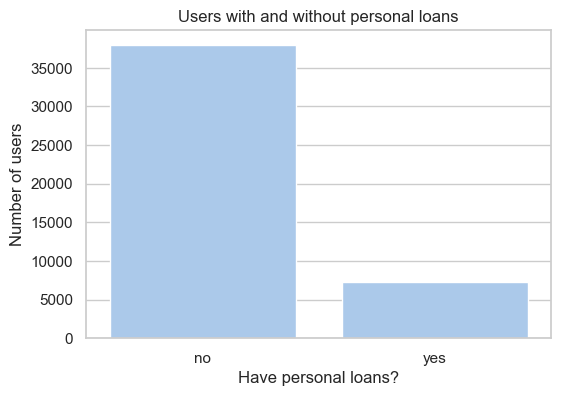

In [5]:
# Setting the chart style for loan values
sns.set_theme(style='whitegrid', palette= 'pastel')

# Count values of loan
loan_counts = df['loan'].value_counts()

# Create the graph
plt.figure(figsize=(6,4))
sns.barplot(x=loan_counts.index, y= loan_counts.values) 

# Titles and labels

plt.title('Users with and without personal loans')
plt.xlabel('Have personal loans?')
plt.ylabel('Number of users')





In [6]:
# types of job
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

<function matplotlib.pyplot.show(close=None, block=None)>

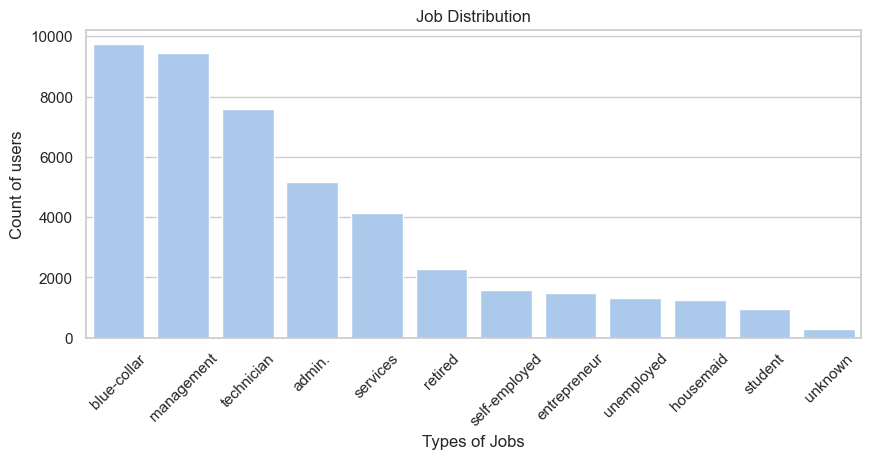

In [7]:
# Bar chart for job, marital and education
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x= 'job', order= df['job'].value_counts().index)
plt.title('Job Distribution')
plt.xticks(rotation= 45)
plt.xlabel('Types of Jobs')
plt.ylabel('Count of users')
plt.show


In [8]:
# ¿DE MEDIA PUEDE TENER UN SOLTERO O DIVORCIADO MÁS PROBABILIDAD DE ACEPTAR EL PRODUCTO FINANCIERO QUE UN CASADO? 
# ¿y UN SOLTERO QUE UN CASADO? ¿SE PREOCUPA MÁS UN DIVORCIADO POR UN PLAN DE AHORRO QUE UN CASADO? (OJO QUE DIVORCIADO INCLUYE TAMBIEN VIUDO)

In [9]:
df_empleo = df.groupby('job')['education_level'].value_counts()
df_empleo

job            education_level  
admin.         High School/VET      4219
               Grade/Higher VET      572
               Primary               209
               unknown               171
blue-collar    High School/VET      5371
               Primary              3758
               unknown               454
               Grade/Higher VET      149
entrepreneur   Grade/Higher VET      686
               High School/VET       542
               Primary               183
               unknown                76
housemaid      Primary               627
               High School/VET       395
               Grade/Higher VET      173
               unknown                45
management     Grade/Higher VET     7801
               High School/VET      1121
               Primary               294
               unknown               242
retired        High School/VET       984
               Primary               795
               Grade/Higher VET      366
               unknown  

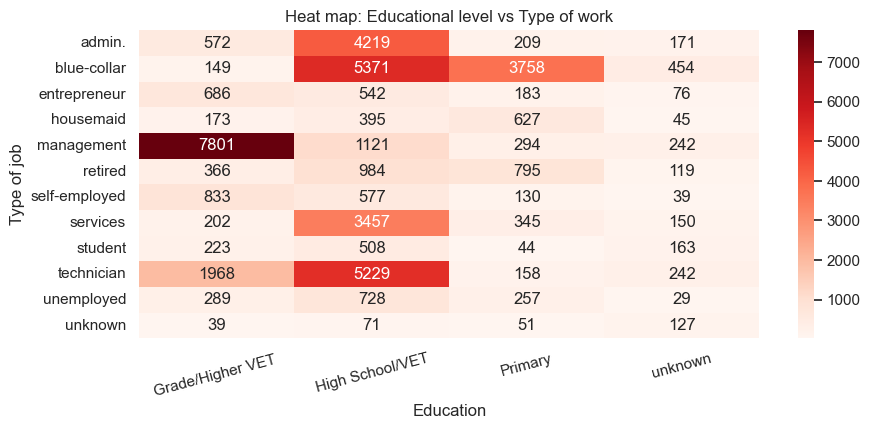

In [10]:
# Relation between education and type of job
df_job_heat = df.groupby(['job', 'education_level']).size().unstack() # --> Unstack Transform the values of the job and education columns into a table. # size is similar than count, but includes null values.
plt.figure(figsize=(10, 4))
sns.heatmap(df_job_heat, annot=True, fmt='g', cmap='Reds') # --> g= general format --> how show the values
plt.title('Heat map: Educational level vs Type of work')
plt.ylabel('Type of job')
plt.xlabel('Education')
plt.xticks(rotation=15)
plt.show()

In [11]:
# What are the most common jobs of unknown education?
df_empleo_reset = df_empleo.reset_index(name='count') # --> converts the index into columns and the Series into a DataFrame.
df_empleo_reset[df_empleo_reset['education_level']== 'unknown'].sort_values(by='count',ascending= False).reset_index(drop=True)

# TENER EN CUENTA QUE HAY ESTUDIOS DESCONOCIDOS CON TRABAJOS DESCONOCIDOS --> VER SI TIENEN UN IMPACTO EN LA MUESTRA Y SI NO ELIMINARLOS

,job,education_level,count
0,blue-collar,unknown,454
1,management,unknown,242
2,technician,unknown,242
3,admin.,unknown,171
4,student,unknown,163
5,services,unknown,150
6,unknown,unknown,127
7,retired,unknown,119
8,entrepreneur,unknown,76
9,housemaid,unknown,45


<function matplotlib.pyplot.show(close=None, block=None)>

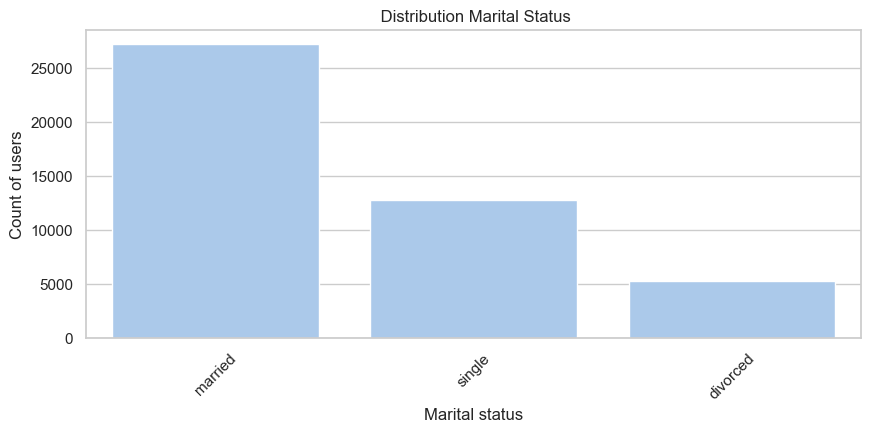

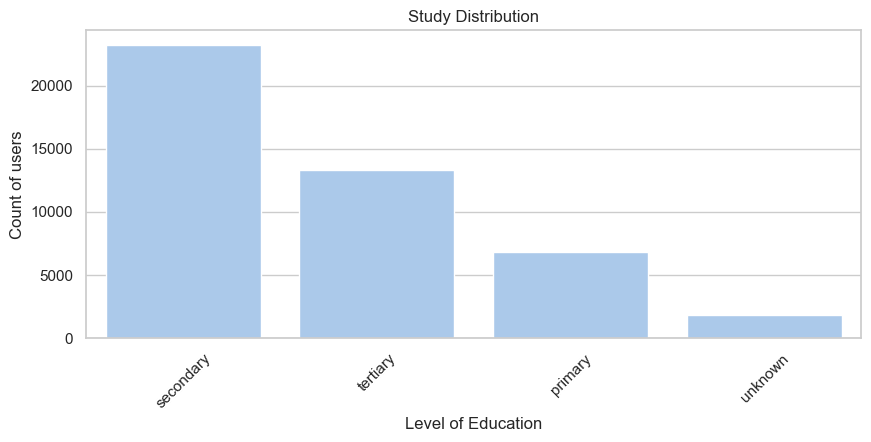

In [12]:
# Bar chart of marital
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x= 'marital', order= df['marital'].value_counts().index)
plt.title(' Distribution Marital Status')
plt.xticks(rotation= 45)
plt.xlabel('Marital status')
plt.ylabel('Count of users')
plt.show

# bar chart of education
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x= 'education', order= df['education'].value_counts().index)
plt.title('Study Distribution')
plt.xticks(rotation= 45)
plt.xlabel('Level of Education')
plt.ylabel('Count of users')
plt.show

In [13]:
# group marital status as married or unmarried--> no, porque puede darse que los viudos estén jubilados, habría rarezas en la visualización o no sería una visualización correcta

In [14]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'education_level'],
      dtype='object')

In [22]:
# View distribution of marital status and deposit subscribed
df_marital = df.groupby('marital')['y'].value_counts().unstack()

df_marital['total'] = (df_marital['yes'] + df_marital['no'])

df_marital['% yes']= (df_marital['yes'] / df_marital['total']) * 100
df_marital['% no']= (df_marital['no'] / df_marital['total']) * 100
display(df_marital.round(2))


y,no,yes,total,% yes,% no
marital,,,,,
divorced,4585,622,5207,11.95,88.05
married,24459,2755,27214,10.12,89.88
single,10878,1912,12790,14.95,85.05


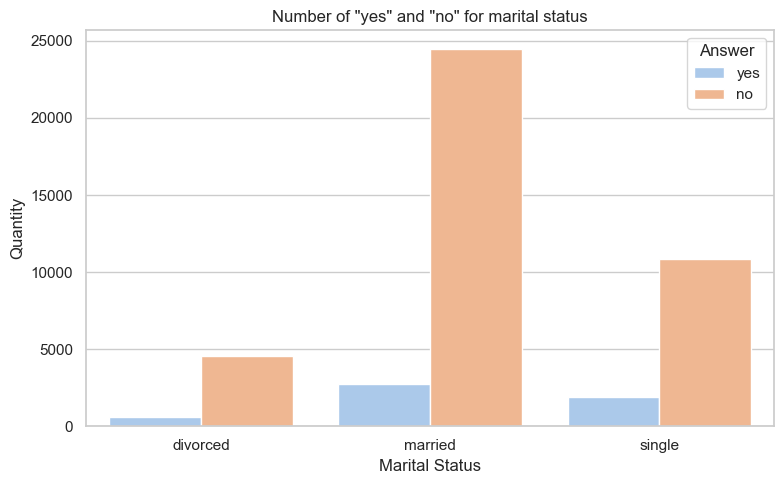

In [21]:
# Crear gráfico de barras agrupadas
plot_marital = df_marital[['yes', 'no']].reset_index().melt(id_vars='marital',
                                                            value_vars= ['yes', 'no'],
                                                            var_name= 'Answer',
                                                            value_name= 'Quantity'
                                                            )
plt.figure(figsize=(8, 5))
sns.barplot(data= plot_marital, x= 'marital', y= 'Quantity', hue= 'Answer', palette= 'pastel')
plt.title('Number of "yes" and "no" for marital status')
plt.xlabel('Marital Status')
plt.ylabel('Quantity')
plt.tight_layout()
plt.show()


In [16]:
"""
Parece ser que los solteros tienen una ligera propensión a aceptar más estos productos financieros
¿Entre qué edad ronda cada uno?
Weno, paso a paso, primero gráfica
"""

'\nParece ser que los solteros tienen una ligera propensión a aceptar más estos productos financieros\n¿Entre qué edad ronda cada uno?\nWeno, paso a paso, primero gráfica\n'

In [ ]:
# Prepare de group of values for visualitation
df_age = df.groupby(['marital', 'y'])['age'].value_counts().unstack()
display(df_age)

age            18    19    20    21    22     23     24     25     26     27  \
marital  y                                                                     
divorced no   NaN   NaN   NaN   NaN   NaN    NaN    1.0    6.0   20.0   16.0   
         yes  NaN   NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN    2.0   
married  no   NaN   NaN   2.0   4.0   9.0   25.0   43.0   84.0  157.0  204.0   
         yes  NaN   NaN   1.0   1.0   NaN    2.0   10.0   14.0   13.0   29.0   
single   no   5.0  24.0  33.0  53.0  80.0  133.0  190.0  324.0  494.0  548.0   
         yes  7.0  11.0  14.0  21.0  40.0   42.0   58.0   99.0  121.0  110.0   

age           ...   85   86   87   88   89   90   92   93   94   95  
marital  y    ...                                                    
divorced no   ...  NaN  1.0  NaN  NaN  1.0  NaN  NaN  NaN  1.0  NaN  
         yes  ...  1.0  1.0  1.0  NaN  NaN  2.0  NaN  NaN  NaN  1.0  
married  no   ...  1.0  4.0  1.0  2.0  2.0  NaN  NaN  NaN  NaN  1.0  
         yes  ...  3.0  2.0  2.0  NaN  NaN  NaN  2.0  2.0  NaN  NaN  
single   no   ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
         yes  ...  NaN  1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[6 rows x 77 columns]

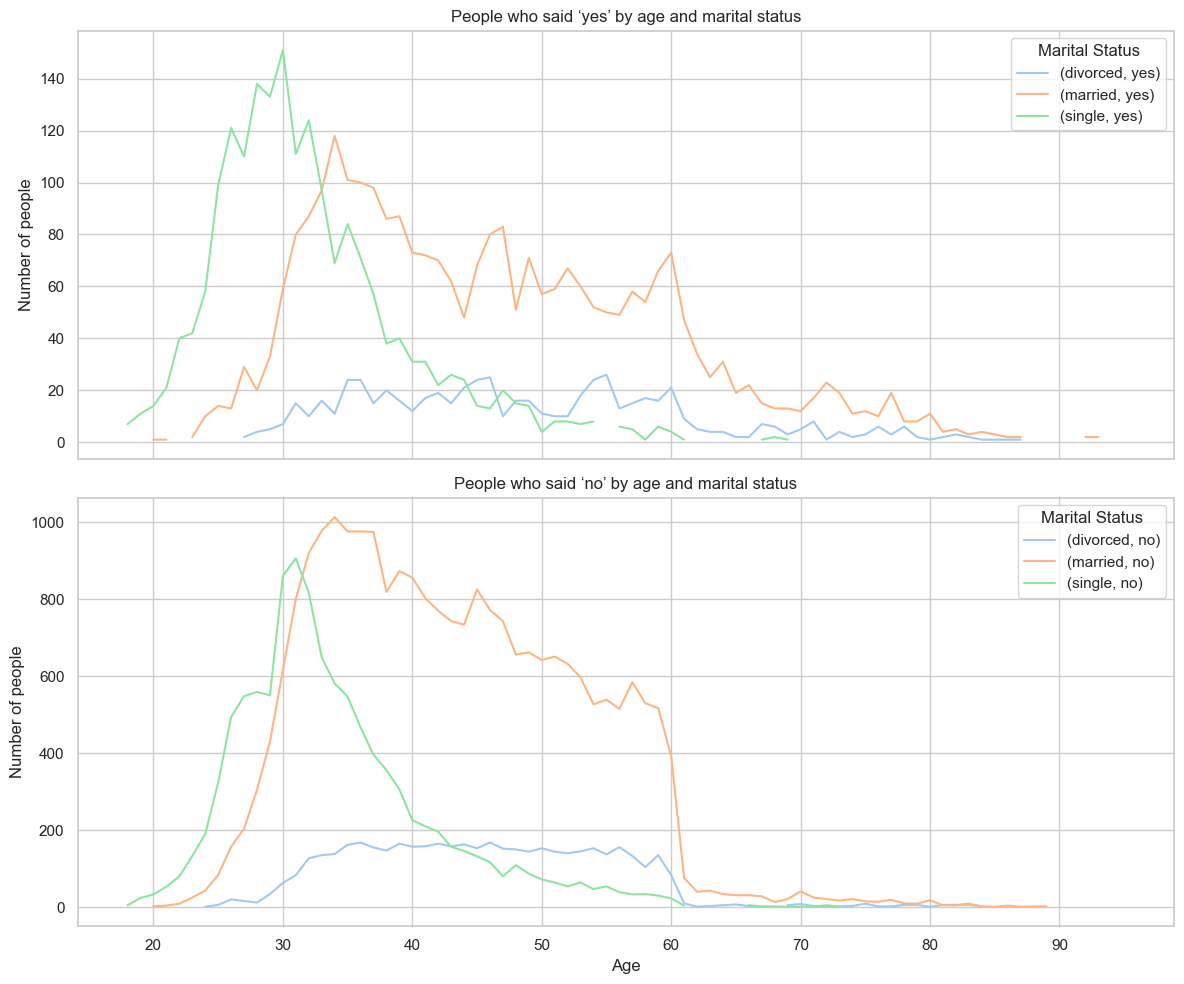

In [61]:
# Transponemos si no está ya
df_plot_age = df_age.T

# Filtramos columnas para cada gráfico
cols_yes = [col for col in df_plot_age.columns if col[1] == 'yes']
cols_no = [col for col in df_plot_age.columns if col[1] == 'no']

# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Gráfico para "yes"
df_plot_age[cols_yes].plot(ax=ax1)
ax1.set_title('People who said ‘yes’ by age and marital status')
ax1.set_ylabel('Number of people')
ax1.legend(title='Marital Status')

# Gráfico para "no"
df_plot_age[cols_no].plot(ax=ax2)
ax2.set_title('People who said ‘no’ by age and marital status')
ax2.set_xlabel('Age')
ax2.set_ylabel('Number of people')
ax2.legend(title='Marital Status')

plt.tight_layout()
plt.show()



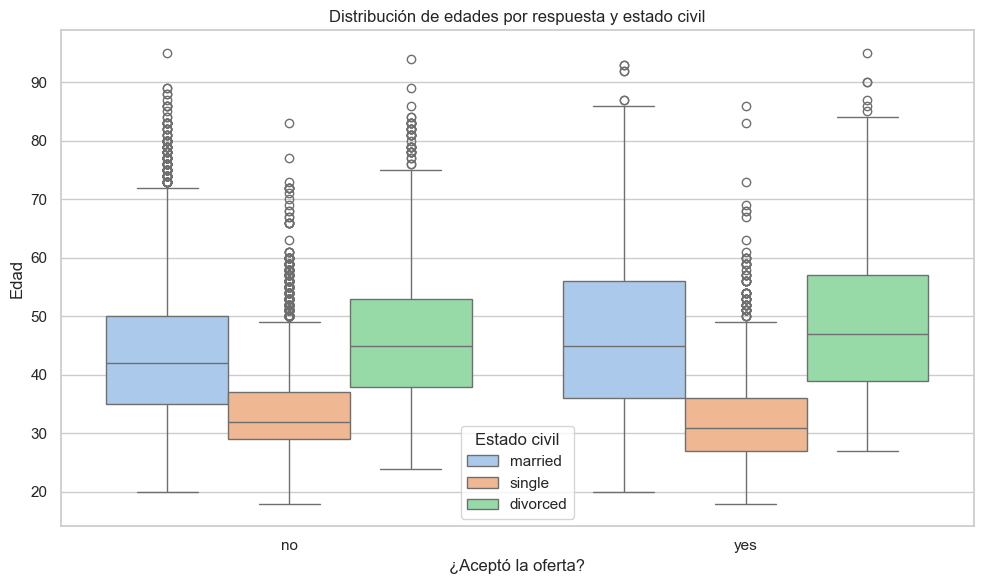

In [62]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='y', y='age', hue='marital', palette='pastel')
plt.title('Distribución de edades por respuesta y estado civil')
plt.xlabel('¿Aceptó la oferta?')
plt.ylabel('Edad')
plt.legend(title='Estado civil')
plt.tight_layout()
plt.show()

In [ ]:
# calculate the average age of acceptance and rejection
df_age_mean = df.groupby(['marital', 'y'])['age'].mean().unstack()
df_age_mean = df_age_mean[['yes', 'no']] # me da tok que salga el no primero
print(df_age_mean)

y               yes         no
marital                       
divorced  49.247588  45.312977
married   46.511434  43.058547
single    32.229079  33.962585


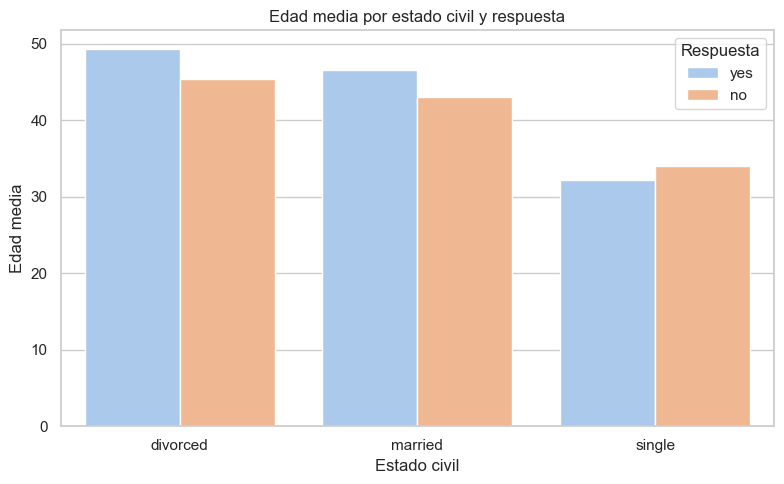

In [54]:
# Bar chart for age mean by marital status and answer
mean_age = df_age_mean[['yes', 'no']].reset_index().melt(id_vars='marital', 
                                                   var_name='Respuesta', 
                                                   value_name='Edad media')

plt.figure(figsize=(8, 5))
sns.barplot(data=mean_age, x='marital', y='Edad media', hue='Respuesta', palette='pastel')
plt.title('Edad media por estado civil y respuesta')
plt.ylabel('Edad media')
plt.xlabel('Estado civil')
plt.tight_layout()
plt.show()


In [64]:
"""
Muestra una tendencia de edades, 
¿solteros jóvenes aceptan más?¿Divorciados/Viudos tiene más o la misma aceptación que los casados a estos productos cuanto más mayor? 
 Consultar que más puede ser curioso de esto
"""

'\nMuestra una tendencia de edades, \n¿solteros jóvenes aceptan más?¿Divorciados/Viudos tiene más o la misma aceptación que los casados a estos productos cuanto más mayor? \n Consultar que más puede ser curioso de esto\n'

In [59]:
df['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [72]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'education_level'],
      dtype='object')

In [73]:
# Analize default
print(df['default'].value_counts())

df_default= df.groupby(['marital', 'education_level'])['default'].value_counts()
display(df_default)

default
no     44396
yes      815
Name: count, dtype: int64


marital   education_level    default
divorced  Grade/Higher VET   no          1433
                             yes           38
          High School/VET    no          2751
                             yes           64
          Primary            no           731
                             yes           21
          unknown            no           164
                             yes            5
married   Grade/Higher VET   no          6934
                             yes          104
          High School/VET    no         13527
                             yes          243
          Primary            no          5162
                             yes           84
          unknown            no          1143
                             yes           17
single    Grade/Higher VET   no          4736
                             yes           56
          High School/VET    no          6466
                             yes          151
          Primary            no           8

,marital,education_level,default,count
0,divorced,Grade/Higher VET,no,1433
1,divorced,Grade/Higher VET,yes,38
2,divorced,High School/VET,no,2751
3,divorced,High School/VET,yes,64
4,divorced,Primary,no,731


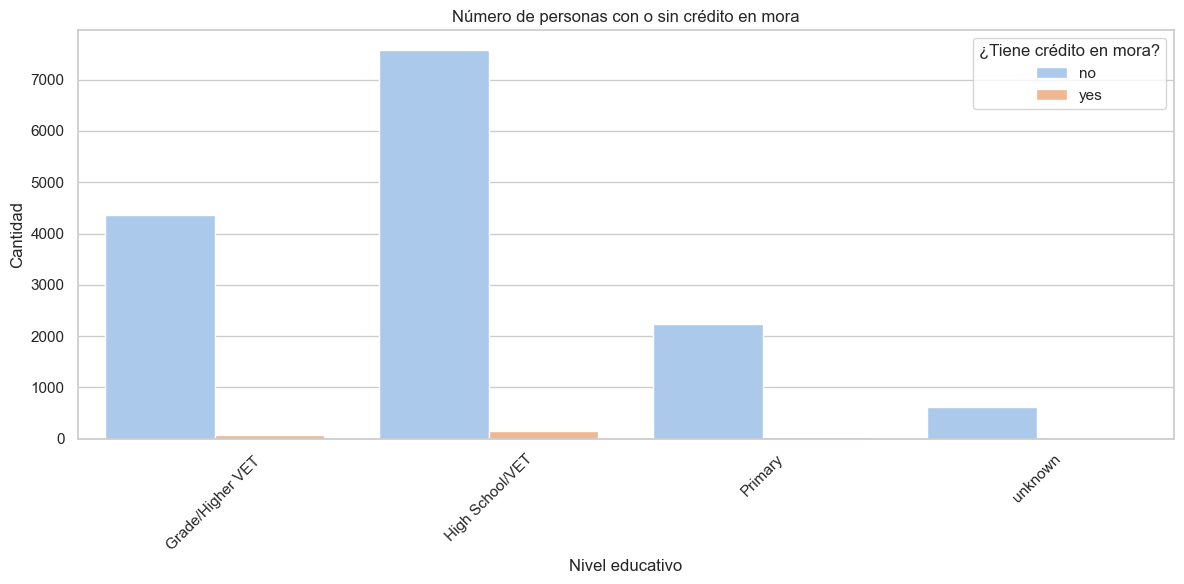

In [77]:
# Change format for display
df_plot = df_default.reset_index(name='count')
display(df_plot.head())

# Bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot, 
            x='education_level', 
            y='count', 
            hue='default', 
            palette='pastel',
            errorbar=None)

plt.title('Número de personas con o sin crédito en mora')
plt.xlabel('Nivel educativo')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend(title='¿Tiene crédito en mora?')
plt.tight_layout()
plt.show()

In [140]:
# Calculate the proportion of non-performing loans by marital status and level of education
df_default = df_default.unstack()
df_default['total']= df_default['yes'] + df_default['no']
df_default['% yes']= (df_default['yes'] / df_default['total'])*100
#df_default['% no']= (df_default['no'] / df_default['total'])*100

display(df_default['% yes'].round(2))

# default_mean = len(df_default['% yes']) --> En variables categóricas o binarias creo que la proporción y la media es la misma, solo se diferencia por su multiplicación por 100
len(df[df['default'] == 'yes']) 

education_level,Grade/Higher VET,High School/VET,Primary,unknown
marital,,,,
divorced,2.58,2.27,2.79,2.96
married,1.48,1.76,1.60,1.47
single,1.17,2.28,2.58,1.89


815

In [152]:
print(df_age.index.levels) # no hay education level en df_age, si quiero ver el rango de edad de single con estudios altos debo crearlo


[['divorced', 'married', 'single'], ['no', 'yes']]


In [ ]:
"""
¿El mayor número de prestamos en demora de pago lo tienen las personas divorciadas de las cuales su nivel de estudio se desconoce?
Los casados tienen en proporcion una menor cantidad de endeudamiento
"""